This ipynb is to train WcGAN

# Import librarys

In [1]:
import pandas as pd
from pymatgen import core
from sklearn.preprocessing import StandardScaler
import torch

import src.preprocess_func as preprocess
import src.model as model
import src.plotting as plotting
import src.variable_generator as vg

# Preprocess data

In [2]:
# Import files
filename = 'srf/SM_FT_dataset.csv'
df = pd.read_csv(filename,index_col=0)

comps = [core.Composition(x) for x in df['Composition']]
dset = preprocess.data_generator(comps)

# X_train data
Training_sequences = dset.real_data
# features' labels
Elements_sequences = dset.elements #input elements sequence

# Y_train data
properties_values = df.iloc[:,1:].values.astype('float32') # Y_train
scaler = StandardScaler() # sklearn Standard_scaler
properties_values_scaled = scaler.fit_transform(properties_values) # Scaled Y_train

# Import models

## Import surrogate models

In [3]:
surrogate_model = model.ANN()
surrogate_model.load_dict()

## Import WcGAN models

In [5]:
WcGAN = model.WcGAN()

#Train gan
# WcGAN.train(dset,properties_values_scaled,num_iterations=int(5e4))

#Load trained gan
WcGAN.load_dict(load_dir="Trained_models/WcGAN.pt")

# Import variable generator class

In [6]:
vg_GAN = vg.WcGAN_variable_generator(GAN_model=WcGAN,
training_sequences=Training_sequences,
properties_values=properties_values,
properties_values_scaled=properties_values_scaled,
scaler=scaler,
surrogate_model=surrogate_model,
latent_dim=10)

## Validication

### Violin plots

In [7]:
V_GAN_data,V_GAN_conds = vg_GAN.preprocess_violinplot()
V_GAN = plotting.violin_plot(V_GAN_data,V_GAN_conds)

### Map plots

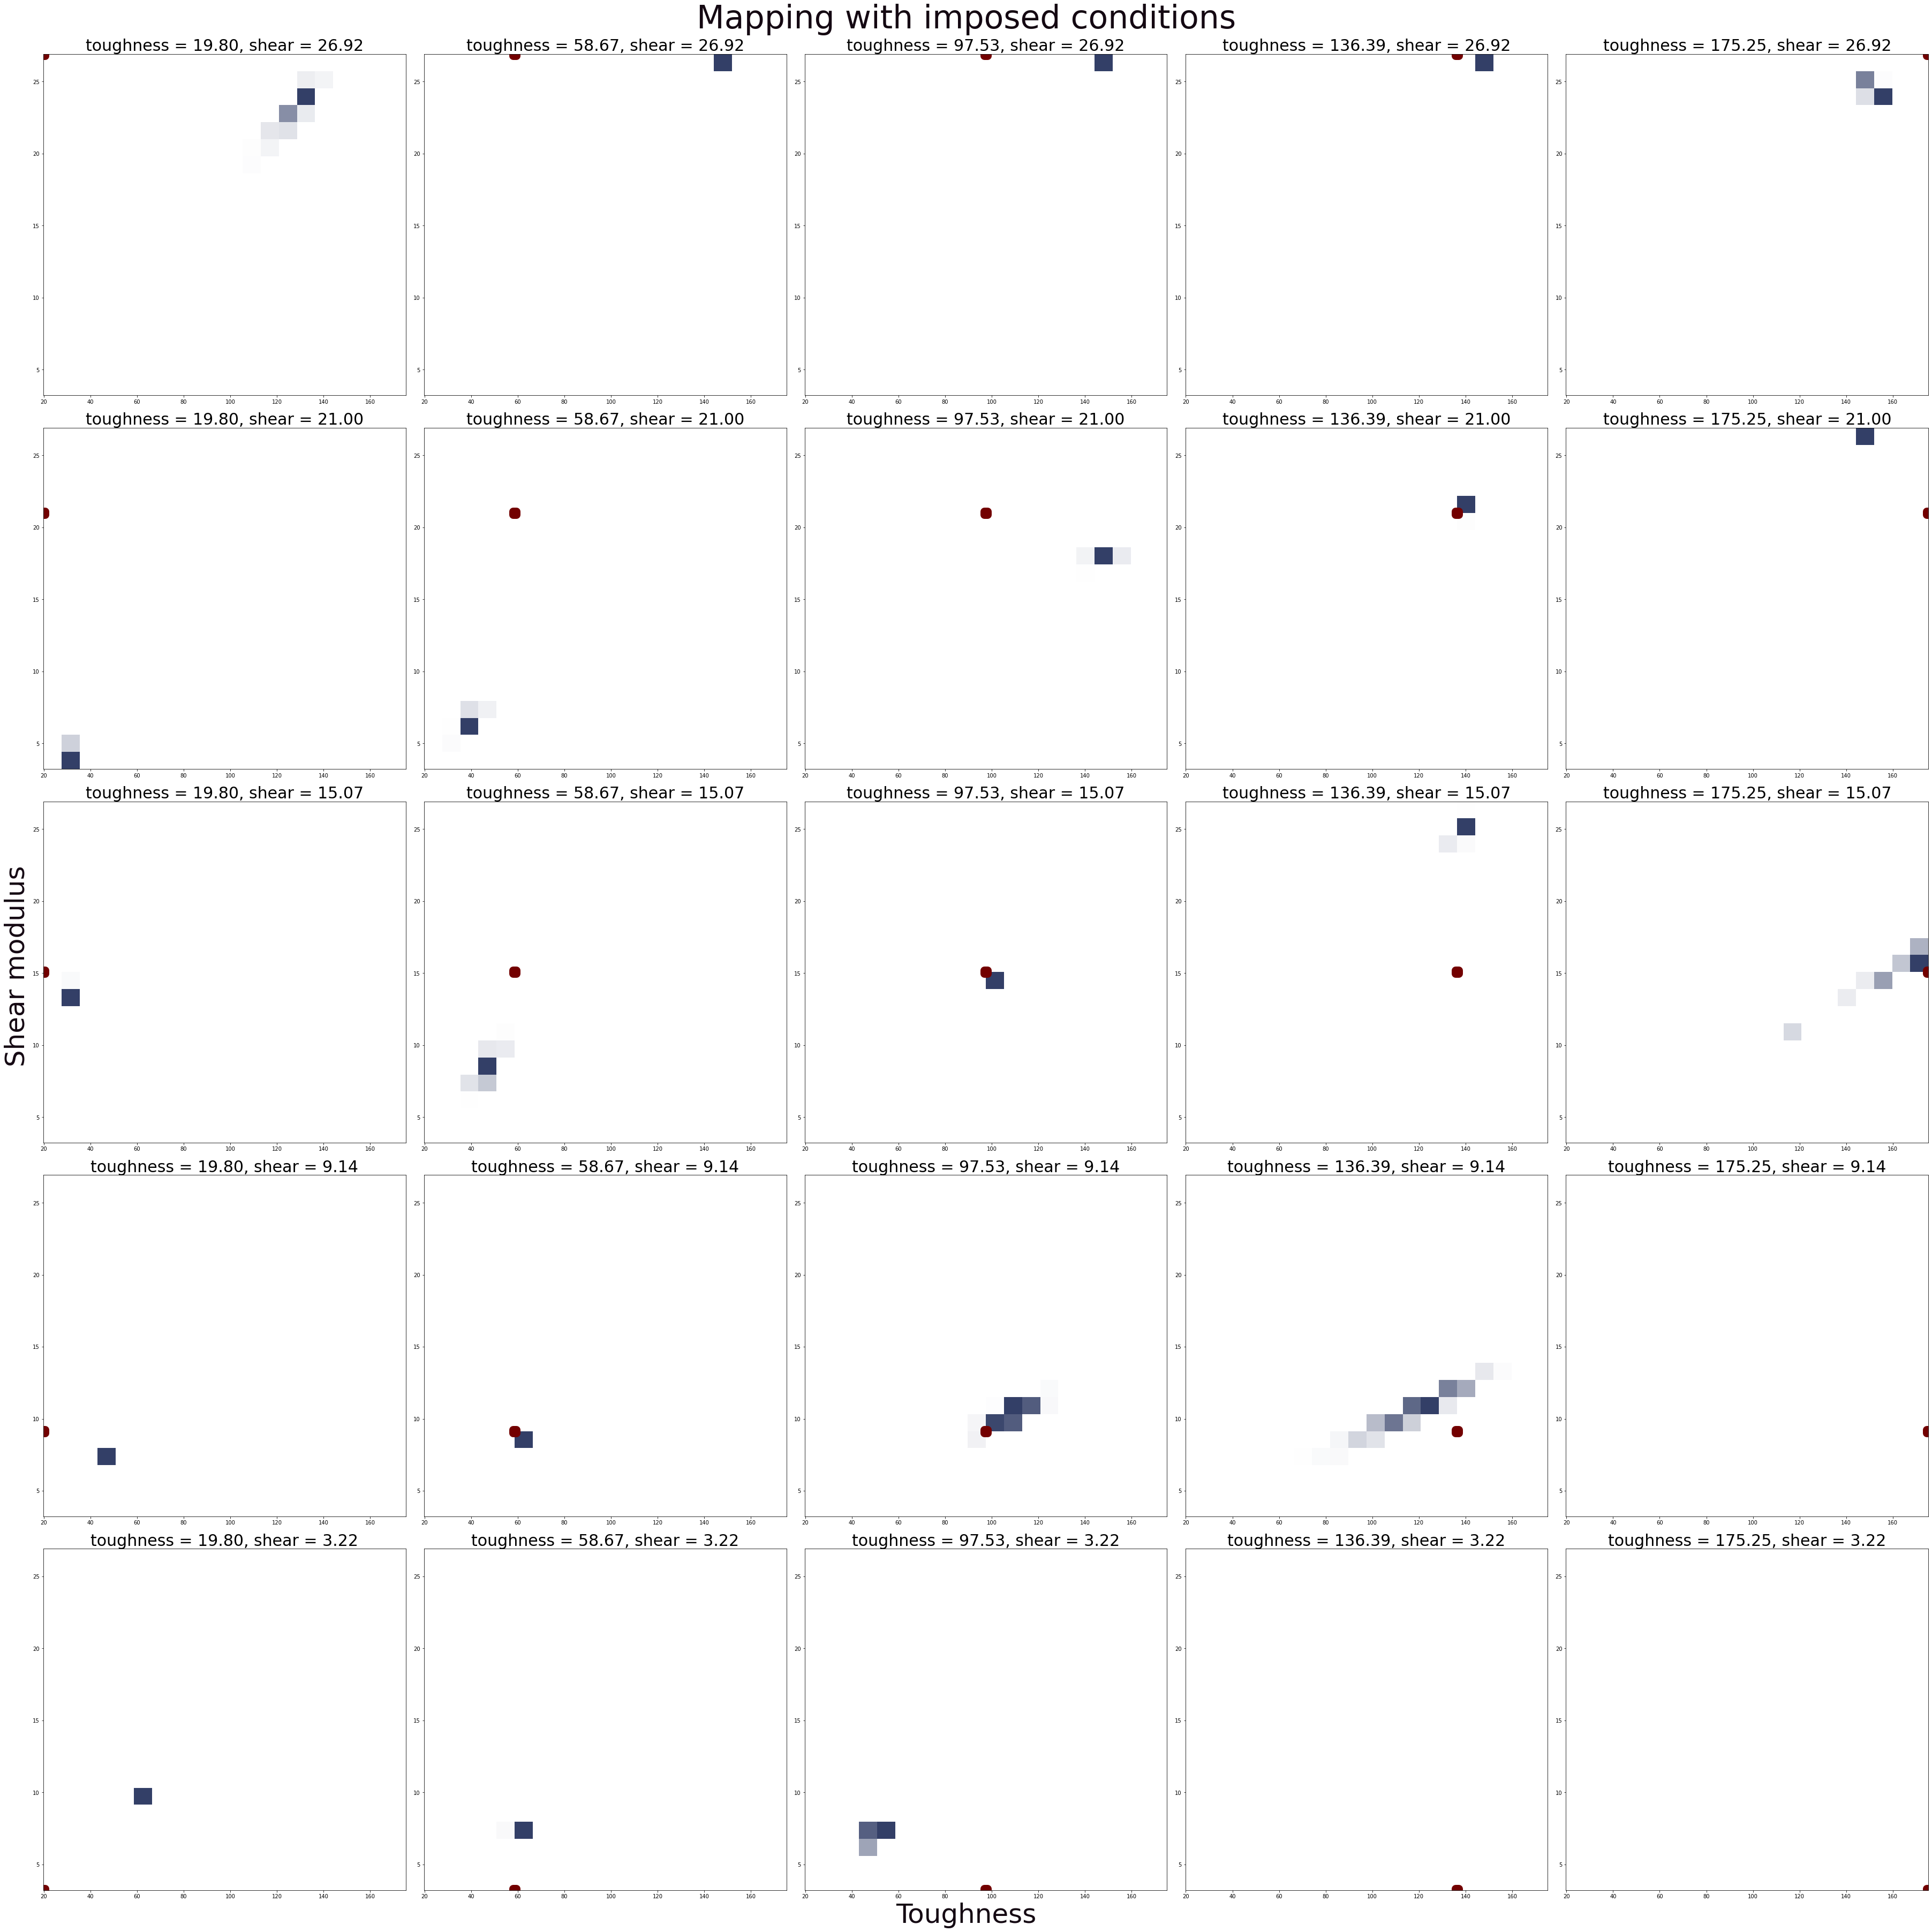

In [8]:
M_GAN_data,M_GAN_conds = vg_GAN.preprocess_mapping()
M_GAN = plotting.variance_map(M_GAN_data,M_GAN_conds)

## Random sample

[47.17157  7.45104]
[46.87125   7.396446]
[46.645252   7.3598814]
[47.003685   7.4020047]
[46.993023  7.412159]


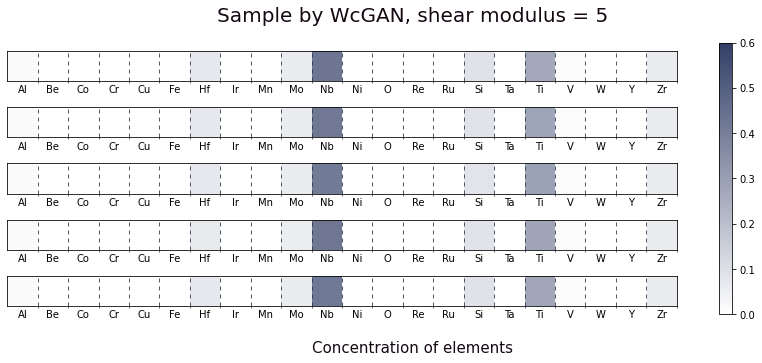

In [9]:
R_WcGAN_sample,R_WcGAN_conds = vg_GAN.g_sample(100,[30,8])

I = 10
R_WcGAN = plotting.sample_plot(R_WcGAN_sample,dset,title = "Sample by WcGAN, shear modulus = 5",interval = I)
for i in range(5):
    print(R_WcGAN_conds[I*i])

## Inerpolation plots fixed conds

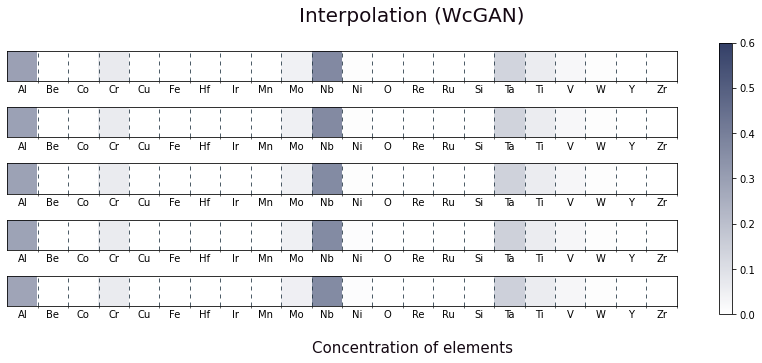

In [10]:
Interpo_WcGAN_sample_fc,Interpo_WcGAN_conds_fc=vg_GAN.preprocess_interpolation_GAN_fixed_conds([60,15])
Interpo_WcGAN_fc = plotting.sample_plot(Interpo_WcGAN_sample_fc,dset,title = "Interpolation (WcGAN)")